In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [33]:
# import the raw data
df_interview = pd.read_csv('data/Interview.csv')

# drop empty columns
df_interview.drop(['Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis= 1, inplace= True)

In [34]:
df_interview.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 23 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

In [35]:
# lets of missing values
# what columns have many NaN

null_rows = {}
cols = df_interview.columns.tolist()

for idx, col in enumerate(cols):
    nulls = len(df_interview[col][df_interview[col].isna()].tolist())
    total = df_interview[df_interview[col].isna()].count().sum()
    null_rows[col] = nulls, total
print(null_rows)

{'Date of Interview': (1, 1), 'Client name': (0, 0), 'Industry': (1, 1), 'Location': (1, 1), 'Position to be closed': (1, 1), 'Nature of Skillset': (1, 1), 'Interview Type': (1, 1), 'Name(Cand ID)': (1, 1), 'Gender': (1, 1), 'Candidate Current Location': (1, 1), 'Candidate Job Location': (1, 1), 'Interview Venue': (1, 1), 'Candidate Native location': (1, 1), 'Have you obtained the necessary permission to start at the required time': (205, 3261), 'Hope there will be no unscheduled meetings': (248, 3999), 'Can I Call you three hours before the interview and follow up on your attendance for the interview': (248, 3994), 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': (248, 3994), 'Have you taken a printout of your updated resume. Have you read the JD and understood the same': (249, 4015), 'Are you clear with the venue details and the landmark.': (249, 4015), 'Has the call letter been shared': (246, 3958), 'Expected Attendance': (6, 76), '

### Some columns have lots of NaN, those will need to be replaced

In [37]:
# rename some columns
new_col_names = ['interview_date', 'client_name', 'industry', 'location', 'interview_position', 'skillset', 'interview_type', 'name', 'gender', 'candidate_current_location', 'candidate_job_location', 'interview_venue', 'candidate_native_location', 'start_time_permission', 'hope_no_unscheduled', 'call_3_hours_prior', 'alternative_number', 'printed_resume_read_jd', 'can_find_interview', 'call_letter_shared', 'expected_attendance', 'actual_attendance', 'marital_status']
df_interview.columns = new_col_names

# convert this date column to the correct format
df_interview['interview_date'].replace(['25 – Apr-16'],'25.04.2016',inplace=True)
df_interview['interview_date'] = df_interview['interview_date'].str[:10]

# make a few new features
df_interview['interview_date'] = pd.to_datetime(df_interview['interview_date'])
df_interview['day'] = df_interview['interview_date'].dt.day_name()
df_interview['month'] = df_interview['interview_date'].dt.month_name()

# deal with bad values
df_interview.drop([1233], axis=0, inplace= True)
df_interview.fillna("empty", inplace= True)

In [38]:
# many columns have mixed-case and misspellings on categorical values

# lowercase specific columns
string_columns = ['client_name', 'industry', 'location',
       'interview_position', 'skillset', 'interview_type', 'name', 'gender',
       'candidate_current_location', 'candidate_job_location',
       'interview_venue', 'candidate_native_location', 'start_time_permission',
       'hope_no_unscheduled', 'call_3_hours_prior', 'alternative_number',
       'printed_resume_read_jd', 'can_find_interview', 'call_letter_shared',
       'expected_attendance', 'actual_attendance', 'marital_status']

for ind_col in string_columns: 
#     print(df_interview[ind_col].dtypes)
    df_interview[ind_col] = df_interview[ind_col].apply(lambda x: str(x).lower().strip())

In [39]:
# remap the unusual entries for category columns

df_interview['can_find_interview'] = df_interview['can_find_interview'].replace({"yes": "yes", "na": "no", "no- i need to check": "no", "na": "no"})
df_interview['call_letter_shared'] = df_interview['call_letter_shared'].replace({'yes': 'yes', 'nan':'no', 'havent checked':'no', 'need to check': 'no', 'not sure': 'no','yet to check': 'no', 'not yet': 'no', 'na': 'no'})
df_interview['expected_attendance'] = df_interview['expected_attendance'].replace({"yes": "yes", "uncertain": "no", "nan": "no", "11:00 am": "yes", "10.30 am": "yes"})
df_interview['actual_attendance'] = df_interview['actual_attendance'].apply(lambda x: x.strip())

df_interview['candidate_current_location'] = df_interview['candidate_current_location'].replace({'chennai':'Chennai', 'chennai ':'Chennai', 'CHENNAI':'Chennai', '- Cochin- ':'Cochin'})
df_interview['candidate_job_location'] = df_interview['candidate_job_location'].replace({'- Cochin- ':'Cochin'})
df_interview['interview_venue'] = df_interview['interview_venue'].replace({'- Cochin- ':'Cochin'})
df_interview['candidate_native_location'] = df_interview['candidate_native_location'].replace({'- Cochin- ':'Cochin', 'Dehli/ NCR': 'NCR'})

df_interview['printed_resume_read_jd'].replace(['yes '],'yes',inplace=True)
df_interview['printed_resume_read_jd'].replace(['no- will take it soon','not yet','na'],'no',inplace=True)
df_interview['call_3_hours_prior'].replace(['no dont','na'],'no',inplace=True)
df_interview['alternative_number'].replace(['no i have only thi number','na'],'no',inplace=True)
df_interview['hope_no_unscheduled'].replace(['not sure','na','cant say','not sure'],'no',inplace=True)
df_interview['start_time_permission'].replace(['yet to confirm','na','not yet'],'no',inplace=True)

df_interview['interview_type'] = df_interview['interview_type'].replace(['scheduled walk in', 'sceduled walkin'], 'scheduled walkin', inplace=True)
df_interview['interview_type'] = df_interview['interview_type'].replace('walkin ', 'walkin', inplace=True)
df_interview['interview_type'] = df_interview['interview_type'].replace('scheduled ', 'scheduled', inplace=True)

df_interview['skillset'].loc[df_interview['skillset'].str.contains('java')] = 'java'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('sccm')] = 'sccm'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('lead')] = 'technical lead'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('cots')] = 'cots'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('kyc')] = 'kyc'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('lending')] = 'l & l'
df_interview['skillset'].loc[df_interview['skillset'].str.contains('analytical')] = 'analytical r&d'
df_interview['skillset'].replace(['9.00 am', '10.00 am', '11.30 am', '12.30 pm', '9.30 am'], 'None', inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### All but the date-time column are categorical, those will need to be dummied/OHE to allow for modeling

In [64]:
# The columns are all cata
new_df = df_interview.drop(['interview_date','name'], axis= 1)
new_df = pd.get_dummies(new_df, drop_first= True)
new_df['interview_date'] = df_interview['interview_date']
print("The original DataFrame has {} columns".format(len(df_interview.columns.tolist())))

The original DataFrame has 25 columns


In [66]:
# how many in the new DF?
print("The dummied DataFrame has {} columns, a {}-fold increase!".format(len(new_df.columns.tolist()), len(new_df.columns.tolist())/len(df_interview.columns.tolist())))

The dummied DataFrame has 175 columns, a 7.0-fold increase!


In [42]:
# save this dummied DF for use in modeling
new_df.to_excel("data/cleaned_interview_data.xls")

In [43]:
df = pd.read_excel("data/cleaned_interview_data.xls")
df.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [45]:
df.columns

Index(['client_name_aon hewitt', 'client_name_aon hewitt gurgaon',
       'client_name_astrazeneca', 'client_name_barclays',
       'client_name_flextronics', 'client_name_hewitt', 'client_name_hospira',
       'client_name_pfizer', 'client_name_prodapt',
       'client_name_standard chartered bank',
       ...
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'interview_date'],
      dtype='object', length=175)

In [46]:
# create the columns to use in models
exclude_cols = ['expected_attendance_no','expected_attendance_yes', 'actual_attendance_yes']
include_cols = [x for x in df.columns.tolist() if x not in exclude_cols]
y = df['actual_attendance_yes'].values
X = df[include_cols].values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Now that we have cleaned data, lets do a bit of EDA

### What factors might impact the attendance at a job interview in the data?

### Relationships to examine:
* Applicant-based factors:
    * Gender differences
    * Marital Status
    * Applicant location
* Seasonal factors:
    * Day of the week
    * Month of year
* Company factors:
    * Hiring Company
    * Job location
    * Company location
    * Industry type
    * Type of position
    * Skillset required

### With so many dummied variables, scatter plots won't be very useful. 

#### **individual plots may work better in this case**

## First, what does the balance of target predictions look like?

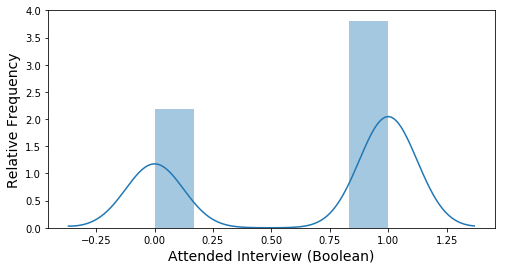

Attended / Not-Attended ratio  1.57 : 1


In [109]:
plt.figure(figsize= (8,4))
sns.distplot(y, label='actual_attendance_yes')
plt.ylabel("Relative Frequency", fontsize= 14)
plt.xlabel("Attended Interview (Boolean)", fontsize= 14)
plt.show();
print("Attended / Not-Attended ratio ", round(float(y.shape/np.sum(y)),2), ": 1")

## That isn't a bad ratio, may not require class balancing

## Applicant-based factors:

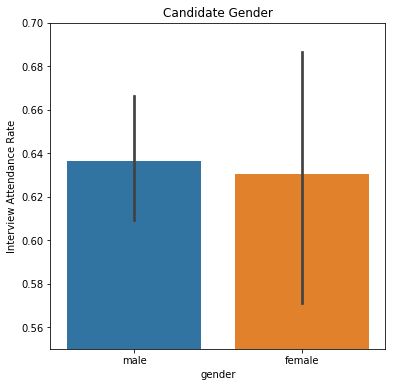

In [69]:
plt.figure(figsize= (6,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['gender'])
plt.ylim(0.55, 0.7)
plt.title("Candidate Gender")
plt.show();

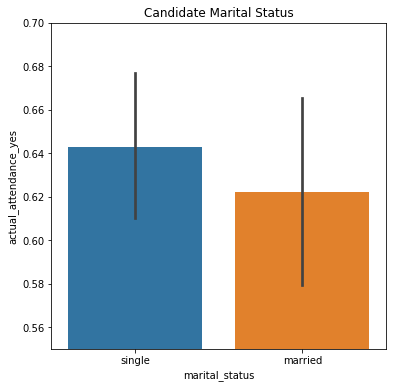

In [70]:
plt.figure(figsize= (6,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['marital_status'])
plt.ylim(0.55, 0.7)
plt.title("Candidate Marital Status")
plt.show();

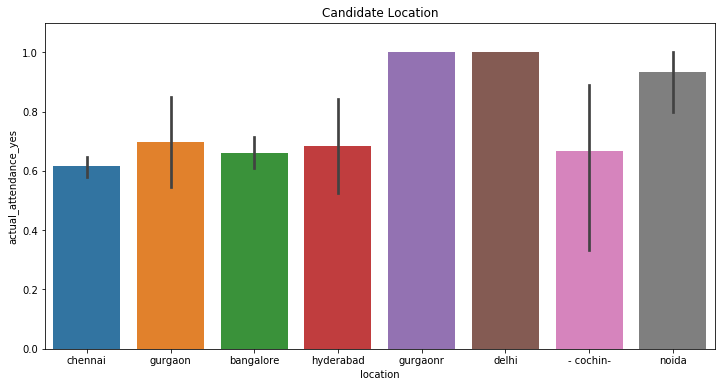

In [73]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['location'])
plt.title("Candidate Location")
plt.ylim(0, 1.1)
plt.show();

## Seasonal Factors:

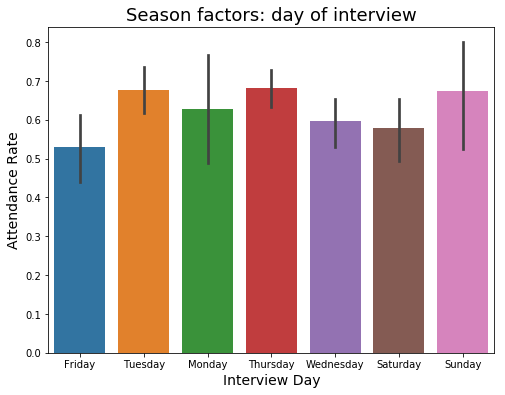

In [114]:
plt.figure(figsize= (8,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['day'])
plt.ylabel("Attendance Rate", fontsize= 14)
plt.xlabel("Interview Day", fontsize= 14)
plt.title("Season factors: day of interview", fontsize= 18)
plt.savefig("imgs/""interview_day.jpg", dpi= 300)
plt.show();

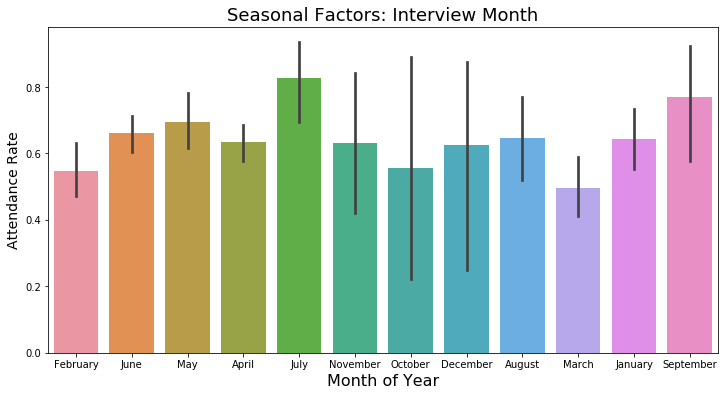

In [118]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['month'])
plt.ylabel("Attendance Rate", fontsize= 14)
plt.xlabel("Month of Year", fontsize= 16)
plt.title("Seasonal Factors: Interview Month", fontsize= 18)
plt.savefig("imgs/interview_month.jpg", dpi= 300)
plt.show();

## Company Factors:

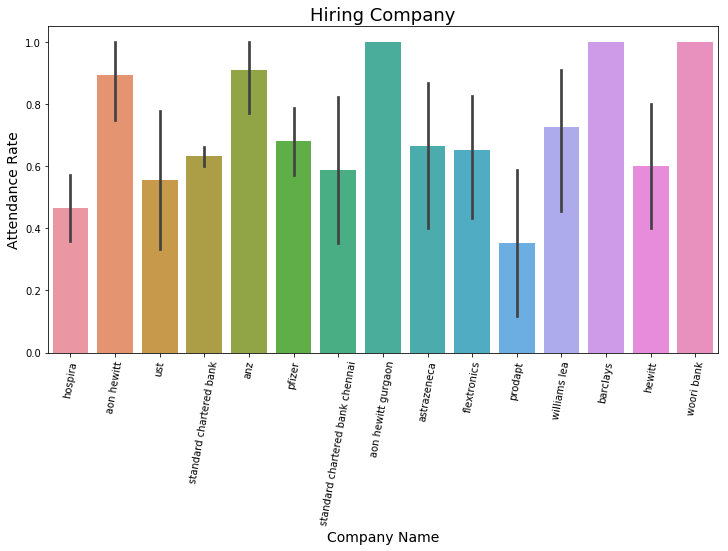

In [122]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['client_name'])
plt.ylabel("Attendance Rate", fontsize= 14)
plt.xlabel("Company Name", fontsize= 14)
plt.title("Hiring Company", fontsize= 18)
plt.xticks(rotation= 80, fontsize= 10, ma= 'left')
plt.show();

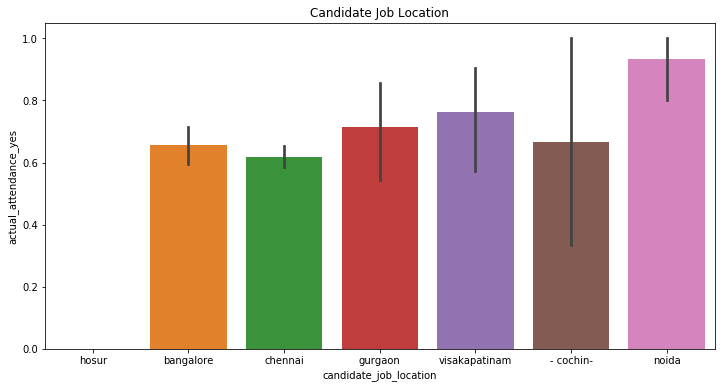

In [77]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['candidate_job_location'])
plt.title("Candidate Job Location")
plt.show();

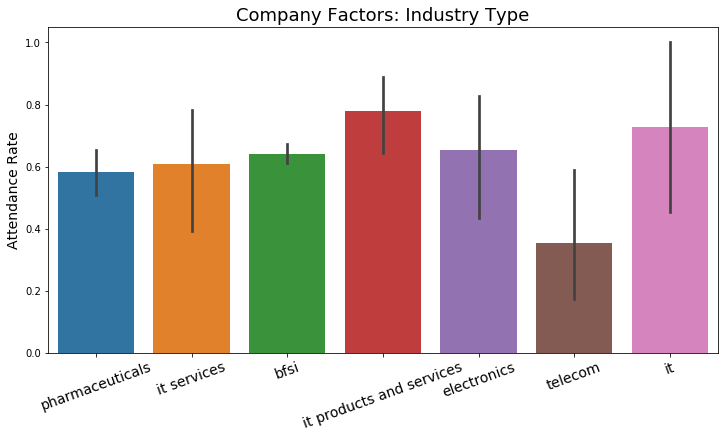

In [141]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['industry'])
plt.ylabel("Attendance Rate", fontsize= 14)
plt.xlabel("")
plt.title("Company Factors: Industry Type", fontsize= 18)
plt.xticks(rotation= 20, fontsize= 14)
plt.savefig("imgs/industry.jpg", dpi= 300)
plt.show();

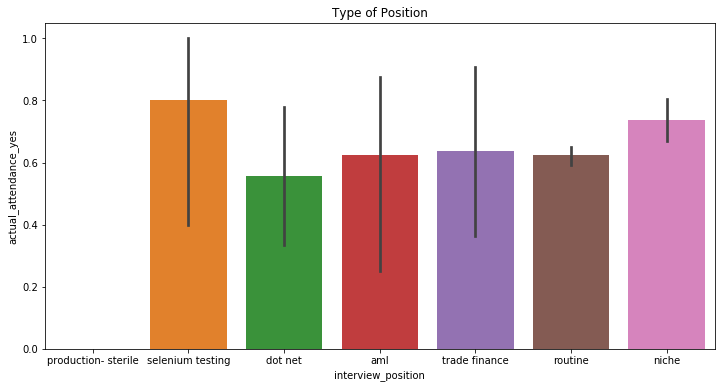

In [78]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['interview_position'])
plt.title("Type of Position")
plt.show();

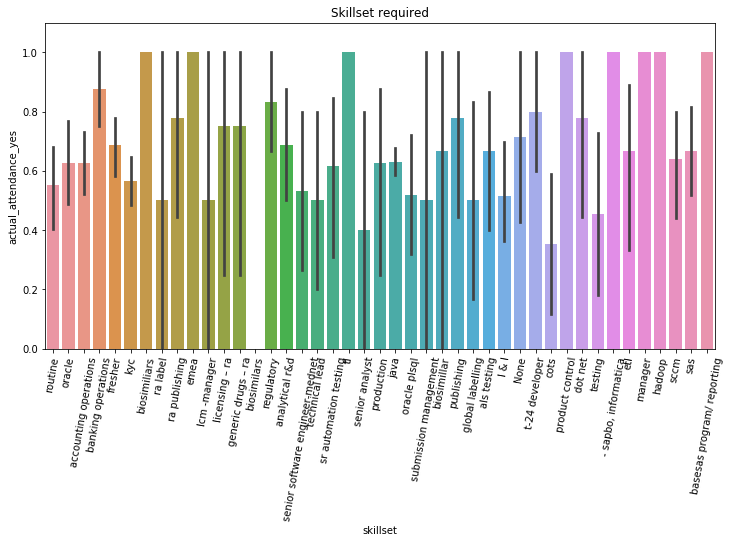

In [80]:
plt.figure(figsize= (12,6))
sns.barplot(y= df['actual_attendance_yes'], x= df_interview['skillset'])
plt.xticks(rotation= 80)
plt.title("Skillset required")
plt.ylim(0, 1.1)
plt.show();

## It looks like there are quite a few features that could be used for a parametric model.

# Conclusions:
* some data cleaning required
* mostly categorical features with many possible answers, some boolean
* Some relationships between features could be used for feature engineering with parametric models

## I will apply Neural Networks to this dataset to predict interview attendance. Other teammates will utilize other approaches toward making the same prediction, and we will compare results to find.